# 3. Image Recognition

## 3.1 Introduction <br>
This experiment classifies images based on the mnist_fashion dataset.
## 3.2 Procedure
### 3.2.1 Importing the Dataset
Step 1 Place the downloaded dataset in a correct location.

Train: X=(60000, 28, 28), Y=(60000,)
Test: X=(10000, 28, 28), Y=(10000,)


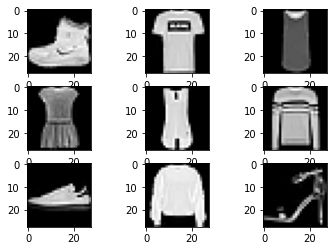

In [1]:
from matplotlib import pyplot
from keras.datasets import fashion_mnist
# load dataset
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

print('Train: X=%s, Y=%s' % (X_train.shape, Y_train.shape))
print('Test: X=%s, Y=%s' % (X_test.shape, Y_test.shape))
# plot beberapa gambar
for i in range(9):
	
	pyplot.subplot(330 + 1 + i)
	
	pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [2]:
#Importation des modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from tensorflow.keras.datasets import fashion_mnist
(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()

# 3.2.2 Preprocessing Data <br>

Before writing neural networks correctly, preprocess the data so that the data complies 
with the input and output formats of the neural networks. <br>
Step 1 Perform one_hot processing.
Perform one_hot processing on the <b>Target</b> data (results) of the dataset.

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
from tensorflow.keras.utils import to_categorical
y_cat_train=to_categorical(y_train)
y_cat_test=to_categorical(y_test)

In [5]:
X_train=X_train/255
X_test=X_test/255

In [6]:
X_train=X_train.reshape(60000,28,28,1)
X_test=X_test.reshape(10000,28,28,1)

## 3.2.3 Building a Neural Network <br>
Step 1 Define an input layer. <br>
Specify the number of neurons at the input layer. However, because the data is loaded in 
the matrix format at the beginning, the input layer is represented in the matrix format.

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(1,1)))
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(1,1)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss="binary_crossentropy",optimizer='adam')

In [8]:
from tensorflow.keras.callbacks import EarlyStopping
early=EarlyStopping(monitor="val_loss",patience=2)

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 26, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 36864)             0         
                                                                 
 dense (Dense)               (None, 128)               4

In [10]:
model.fit(X_train,y_cat_train,validation_data=(X_test,y_cat_test),epochs=32,callbacks=[early])

Epoch 1/32
1875/1875 [==============================] - 180s 95ms/step - loss: 0.0676 - val_loss: 0.0532
Epoch 2/32
1875/1875 [==============================] - 174s 93ms/step - loss: 0.0430 - val_loss: 0.0450
Epoch 3/32
1875/1875 [==============================] - 167s 89ms/step - loss: 0.0320 - val_loss: 0.0455
Epoch 4/32
1875/1875 [==============================] - 165s 88ms/step - loss: 0.0230 - val_loss: 0.0466


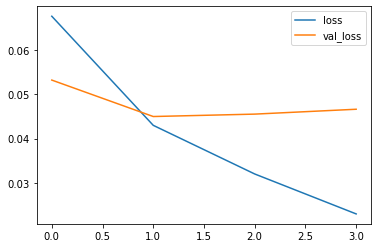

In [12]:
losses=pd.DataFrame(model.history.history)
losses.plot()

In [13]:
predictions=np.argmax(model.predict(X_test),axis=1)
predictions

313/313 [==============================] - 6s 19ms/step


array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [14]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1000
           1       0.99      0.98      0.99      1000
           2       0.85      0.90      0.87      1000
           3       0.92      0.93      0.92      1000
           4       0.84      0.90      0.87      1000
           5       0.98      0.99      0.98      1000
           6       0.80      0.70      0.75      1000
           7       0.97      0.97      0.97      1000
           8       0.98      0.97      0.98      1000
           9       0.98      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [15]:
conf_mat = confusion_matrix(y_test,predictions)

Text(0.5, 33.0, 'Prediksi')

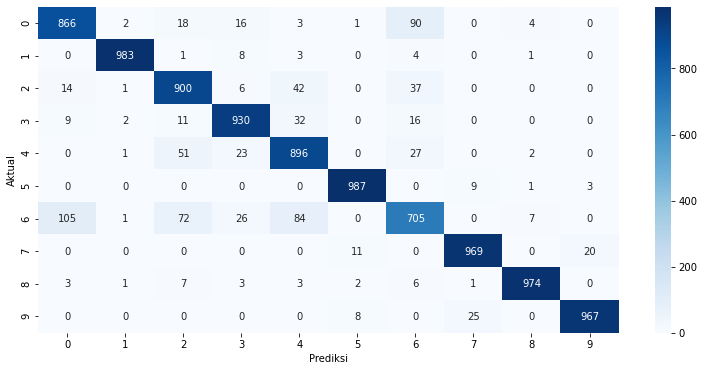

In [16]:
plt.figure(figsize=(13,6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Aktual')
plt.xlabel('Prediksi')

## Autoencoders for denoising images

In [19]:
#load the MNIST dataset
(xtrain,ytrain),(xtest,ytest) = fashion_mnist.load_data()
#scaling the images
xtrain = (xtrain - 127.5) / 127.5
xtest = (xtest - 127.5) / 127.5
# reshaping images to channel format - samples,row,cols,channels
xtrain = xtrain.reshape(60000,28,28,1)
xtest = xtest.reshape(10000,28,28,1)
print(xtrain.shape)
print(xtest.shape)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [20]:
input_layer = layers.Input(shape=(28,28,1))
c1 = layers.Conv2D(16,(3,3),activation='relu',padding='same',strides=(2,2))(input_layer)
c2 = layers.Conv2D(8,(3,3),activation='relu',padding='same',strides=(2,2))(c1)

c3 = layers.Conv2DTranspose(8,(3,3),activation='relu',padding='same',strides=(2,2))(c2)
c4 = layers.Conv2DTranspose(16,(3,3),activation='relu',padding='same',strides=(2,2))(c3)
output_layer = layers.Conv2D(1,(3,3),activation='tanh',padding='same')(c4)

model = models.Model(input_layer,output_layer)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 16)        160       
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 8)        584       
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 16)       1168      
 ranspose)                                                       
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 1)         145   

In [21]:
from tensorflow.keras import losses
model.compile(optimizer='adam',loss=losses.MeanSquaredError())

In [22]:
import tensorflow as tf
noise_factor = 0.6
xtrain_noisy = xtrain + noise_factor * tf.random.normal(shape=xtrain.shape)
xtest_noisy = xtest + noise_factor * tf.random.normal(shape=xtest.shape)

xtrain_noisy = tf.clip_by_value(xtrain_noisy,-1.0,1.0) 
xtest_noisy = tf.clip_by_value(xtest_noisy,-1.0,1.0)

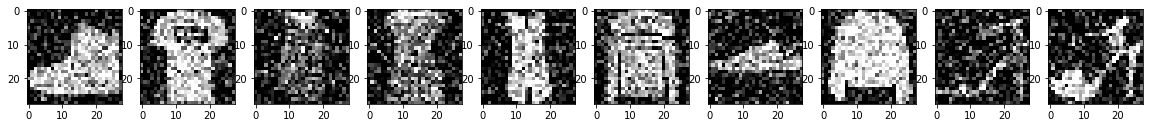

In [23]:
n=10
plt.figure(figsize=(20,3))
for i in range(n):
  plt.subplot(1,n,i+1)
  plt.imshow(tf.squeeze(xtrain_noisy[i]),cmap='gray')
plt.show()

In [24]:
model.fit(xtrain_noisy,xtrain,epochs=10,batch_size=10,shuffle=True,validation_data=(xtest_noisy,xtest))

Epoch 1/10
6000/6000 [==============================] - 90s 14ms/step - loss: 0.0543 - val_loss: 0.0431
Epoch 2/10
6000/6000 [==============================] - 83s 14ms/step - loss: 0.0421 - val_loss: 0.0420
Epoch 3/10
6000/6000 [==============================] - 88s 15ms/step - loss: 0.0410 - val_loss: 0.0410
Epoch 4/10
6000/6000 [==============================] - 84s 14ms/step - loss: 0.0404 - val_loss: 0.0405
Epoch 5/10
6000/6000 [==============================] - 85s 14ms/step - loss: 0.0400 - val_loss: 0.0401
Epoch 6/10
6000/6000 [==============================] - 85s 14ms/step - loss: 0.0397 - val_loss: 0.0399
Epoch 7/10
6000/6000 [==============================] - 68s 11ms/step - loss: 0.0395 - val_loss: 0.0395
Epoch 8/10
6000/6000 [==============================] - 62s 10ms/step - loss: 0.0394 - val_loss: 0.0396
Epoch 9/10
6000/6000 [==============================] - 64s 11ms/step - loss: 0.0393 - val_loss: 0.0394
Epoch 10/10
6000/6000 [==============================] - 59s 10m

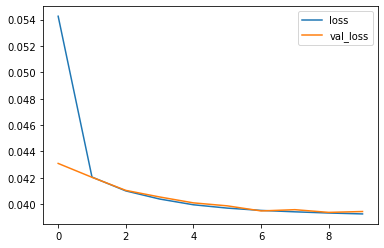

In [25]:
LossesEnco=pd.DataFrame(model.history.history)
LossesEnco.plot()

In [27]:
predictionn = model.predict(xtest_noisy)
predictionn.shape

313/313 [==============================] - 5s 9ms/step


(10000, 28, 28, 1)

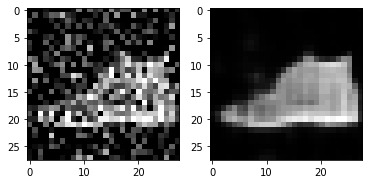

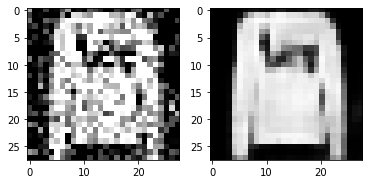

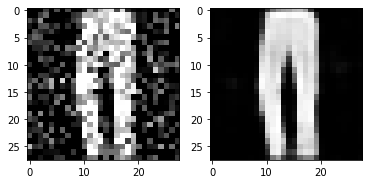

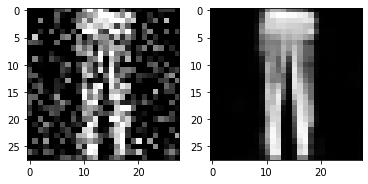

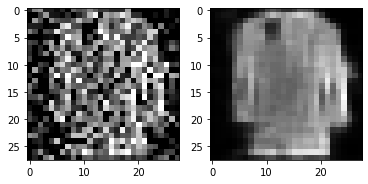

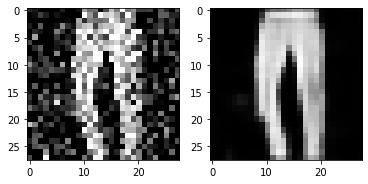

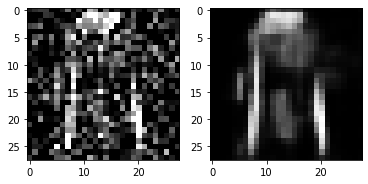

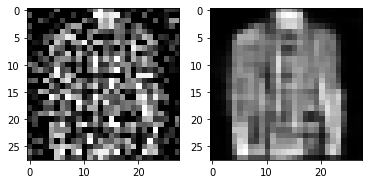

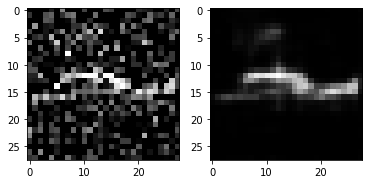

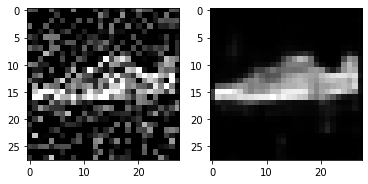

In [31]:
n = 10
for i in range(10):
  plt.subplot(121)
  plt.imshow(tf.squeeze(xtest_noisy[i]),cmap='gray')
  plt.subplot(122)
  plt.imshow(predictionn[i].reshape(28,28),cmap='gray')
  plt.show()